# Assignment2

# Instruction

1. All the required dataset are attached with the file.
    (ufo.csv dataset for Question 1,
    u.user dataset for Question 2,
    Movie.csv dataset for Question 3)
2. Don’t plagiarize, Plagiarism would lead to straight zero
3. Clearly mention your NAME and ROLL NO#.
4. Late submissions are not allowed. Start Early.

In [ ]:
#import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import style

## Question1

In [ ]:
# read ufo.csv into a DataFrame called 'ufo'
ufo=pd.read_csv("ufo.csv")
# print the head and the tail
print(ufo.head())
print(ufo.tail())
# examine the default index, data types, and shape of ufo dataframe
print(ufo.index)
print(ufo.dtypes)
print(ufo.shape)

                   City Colors Reported Shape Reported State             Time
0                Ithaca             NaN       TRIANGLE    NY   6/1/1930 22:00
1           Willingboro             NaN          OTHER    NJ  6/30/1930 20:00
2               Holyoke             NaN           OVAL    CO  2/15/1931 14:00
3               Abilene             NaN           DISK    KS   6/1/1931 13:00
4  New York Worlds Fair             NaN          LIGHT    NY  4/18/1933 19:00
                  City Colors Reported Shape Reported State             Time
33856  West Des Moines             NaN          LIGHT    IA  9/11/2005 21:03
33857           Clovis             NaN          LIGHT    NM  9/11/2005 22:30
33858         Hesperia             NaN       TRIANGLE    CA  9/11/2005 22:30
33859        Dade City             NaN          LIGHT    FL  9/11/2005 23:00
33860         Henniker             NaN            NaN    NH                9
RangeIndex(start=0, stop=33861, step=1)
City               object
Colo

In [ ]:
# count the number of missing values in each column
ufo.isnull().sum()
# count total number of null vlaues in the dataframe
ufo.isnull().sum().sum()
 # print those rows which has null values
is_NaN = ufo.isnull()
NullValueRows = ufo[is_NaN.any(axis=1)]
NullValueRows.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [ ]:
# fill null values, 
#if any column is numerical has null value than fill this column with mean of that column

#if any column is categorical than fill this column with most frequent value of that column
def fillna(column):
    ValOfColumn=column.value_counts().index[0]
    column.fillna(ValOfColumn, inplace=True)
    return column
ufo=ufo.apply(lambda column:fillna(column))
ufo.head(20)
# ufo.isnull().sum()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,RED,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,RED,OTHER,NJ,6/30/1930 20:00
2,Holyoke,RED,OVAL,CO,2/15/1931 14:00
3,Abilene,RED,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,RED,LIGHT,NY,4/18/1933 19:00
5,Valley City,RED,DISK,ND,9/15/1934 15:30
6,Crater Lake,RED,CIRCLE,CA,6/15/1935 0:00
7,Alma,RED,DISK,MI,7/15/1936 0:00
8,Eklutna,RED,CIGAR,AK,10/15/1936 17:00
9,Hubbard,RED,CYLINDER,OR,6/15/1937 0:00


In [ ]:
# calculate the most frequent value for each of the columns (in a single command)
new_ufo = ufo.apply(lambda x:x.value_counts().index[0])
print(new_ufo)
# what are the four most frequent colors reported?
new_ufo=pd.read_csv("ufo.csv")
new_ufo_values=ufo['Colors Reported'].value_counts()
new_ufo_values_first_four=new_ufo_values.head(4)
# for reports in VA, what's the most frequent city?
new_ufo=ufo[ufo.State=='VA']
totalValues=new_ufo.City.value_counts()
mostFrqnt=totalValues.head(1)
mostFrqnt
# show only the UFO reports from Arlington, VA
particularUfo=ufo[(ufo.City=='Arlington') & (ufo.State=='VA')]
particularUfo
# show only the UFO reports in which the City is missing
new_ufo=pd.read_csv("ufo.csv")
particularCityUfo=new_ufo[new_ufo.City.isnull()]
particularCityUfo
# how many rows remain if you drop all rows with any missing values?
new_ufo=pd.read_csv("ufo.csv")
rmn=new_ufo.dropna()
rmn.shape[0]
# replace any spaces in the column names with an underscore
ufo.columns = ufo.columns.str.replace(' ', '_')
ufo.head()
# create a new column called 'Location' that includes both City and State
# For example, the 'Location' for the first row would be 'Ithaca, NY'
ufo['Location'] = ufo.City + ',' + ufo.State
ufo.head()
# map existing values to a different set of values
# like in column 'is_male', convert F value to 0 and M to 1 with pandas
# In other words, your code should not reference the specific column names
ufo=ufo.replace(' ', '_', regex=True)
ufo.columns = ufo.columns.str.replace(' ', '_')
ufo.head(10)
# convert datatype of column 'time'  to the datetime format

City                        Seattle
Colors Reported                 RED
Shape Reported                LIGHT
State                            CA
Time               11/16/1999 19:00
dtype: object


,City,Colors_Reported,Shape_Reported,State,Time,Location
0,Ithaca,RED,TRIANGLE,NY,6/1/1930_22:00,"Ithaca,NY"
1,Willingboro,RED,OTHER,NJ,6/30/1930_20:00,"Willingboro,NJ"
2,Holyoke,RED,OVAL,CO,2/15/1931_14:00,"Holyoke,CO"
3,Abilene,RED,DISK,KS,6/1/1931_13:00,"Abilene,KS"
4,New_York_Worlds_Fair,RED,LIGHT,NY,4/18/1933_19:00,"New_York_Worlds_Fair,NY"
5,Valley_City,RED,DISK,ND,9/15/1934_15:30,"Valley_City,ND"
6,Crater_Lake,RED,CIRCLE,CA,6/15/1935_0:00,"Crater_Lake,CA"
7,Alma,RED,DISK,MI,7/15/1936_0:00,"Alma,MI"
8,Eklutna,RED,CIGAR,AK,10/15/1936_17:00,"Eklutna,AK"
9,Hubbard,RED,CYLINDER,OR,6/15/1937_0:00,"Hubbard,OR"


# Question 2

In [ ]:
#importing file
users = pd.read_table('u.user', sep='|', index_col='user_id')

Describe and show the dataframe

In [ ]:
# describe information of all columns
users.describe(include='all')
# describe information of all numeric columns only
users.describe()
# describe information of all object columns only
users.describe(include=['object'])
# show first 10 rows of users dataframe
users.head(10)

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213
6,42,M,executive,98101
7,57,M,administrator,91344
8,36,M,administrator,05201
9,29,M,student,01002


detecting duplicate rows

In [ ]:
# check wheather a row is identical to a previous row
users.duplicated()
# count all duplicate rows in the dataframe
x=users.duplicated()
x=x.sum()
x
# show only duplicate rows in the dataframe
x=users.duplicated()
users[x]
# drop all duplicate rows in the dataframe
users.drop_duplicates() 
# check a single specific column for duplicates occur or not
users.gender.duplicated() 
# check specify more than one column for finding duplicates
users.duplicated(['age', 'gender']).head() 

user_id
1    False
2    False
3    False
4     True
5    False
dtype: bool

In [ ]:
# display the 3 most frequent occupations in 'users'
users['occupation'].value_counts().head(3)
# change the data type of a column name age from int to float
users.age = users.age.astype(float)
users.head()
# for each occupation, calculate the minimum and maximum ages
x=users.groupby('occupation')
x=x.age.agg(['min', 'max'])
x

,min,max
occupation,,
administrator,21.0,70.0
artist,19.0,48.0
doctor,28.0,64.0
educator,23.0,63.0
engineer,22.0,70.0
entertainment,15.0,50.0
executive,22.0,69.0
healthcare,22.0,62.0
homemaker,20.0,50.0


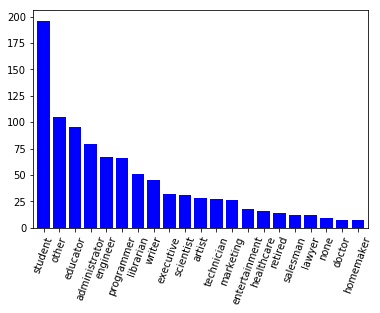

In [ ]:
# for each occupation in 'users', count the number of occurrences
NoOfOccrncesInOcuupation=users['occupation'].value_counts()
NoOfOccrncesInOcuupation
# plot barchar of upper out w.r.t each occupation 
%matplotlib inline
NoOfOccrncesInOcuupation.plot.bar(rot=70,width = 0.8,color = "b",linewidth = 15, linestyle = "solid") 

(-1.101559977495894,
 1.1000742876769898,
 -1.1014247906362087,
 1.1000796678516509)

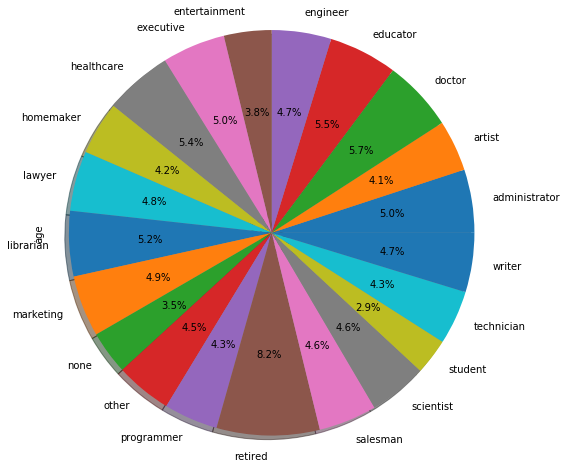

In [ ]:
# for each occupation, calculate the mean age
OccMean=users.groupby('occupation').age.mean()
OccMean
# plot pie chart of the upper output
plot = OccMean.plot.pie(figsize=(8,8),autopct='%1.1f%%',shadow = True)
plot.axis('equal')

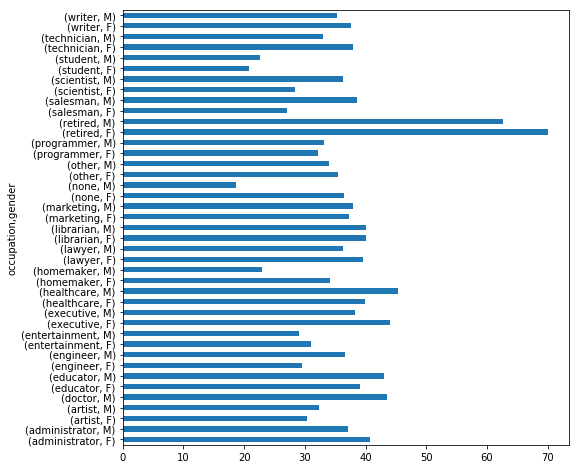

In [ ]:
# for each combination of occupation and gender, calculate the mean age
OccGendrMean=users.groupby(['occupation', 'gender'])
OccGendrMean=OccGendrMean.age.mean()
OccGendrMean
# plot barchar of upper out w.r.t each occupation and gender 
%matplotlib inline
OccGendrMean.plot.barh(figsize=(8,8))

In [ ]:
# sort 'users' by 'occupation' and then by 'age' (in a single command)
users.sort_values(['occupation', 'age'])

,age,gender,occupation,zip_code
user_id,,,,
118,21.0,M,administrator,90210
180,22.0,F,administrator,60202
282,22.0,M,administrator,20057
317,22.0,M,administrator,13210
439,23.0,F,administrator,20817
509,23.0,M,administrator,10011
394,25.0,M,administrator,96819
665,25.0,M,administrator,55412
726,25.0,F,administrator,80538


# Question 3

In [ ]:
# read movie.csv into a DataFrame called 'movie'
movie=ufo=pd.read_csv("movie.csv")
# describe the dataframe
movie.describe()
#rename the column Runtime (Minutes) with Runtime_Minutes, and Revenue (Millions) with Revenue_Millions 
movie.columns=[i.split()[0]+"_"+i.split()[1]  if len(i.split())>1 else i for i in movie.columns]
movie=movie.rename(columns = {'Revenue_(Millions)':'Revenue_Millions','Runtime_(Minutes)':'Runtime_Minutes'})
movie.tail(100)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime_Minutes,Rating,Votes,Revenue_Millions,Metascore
900,901,Sleeping with Other People,"Comedy,Drama,Romance",A good-natured womanizer and a serial cheater ...,Leslye Headland,"Jason Sudeikis, Alison Brie, Jordan Carlos,Mar...",2015,101,6.5,27730,0.81,64.0
901,902,Snakes on a Plane,"Action,Adventure,Crime",An FBI agent takes on a plane full of deadly a...,David R. Ellis,"Samuel L. Jackson, Julianna Margulies, Nathan ...",2006,105,5.6,118905,34.01,58.0
902,903,What If,"Comedy,Romance","Wallace, who is burned out from a string of fa...",Michael Dowse,"Daniel Radcliffe, Zoe Kazan, Megan Park, Adam ...",2013,98,6.8,55243,3.45,59.0
903,904,How to Train Your Dragon 2,"Animation,Action,Adventure",When Hiccup and Toothless discover an ice cave...,Dean DeBlois,"Jay Baruchel, Cate Blanchett, Gerard Butler, C...",2014,102,7.9,237565,177.00,76.0
904,905,RoboCop,"Action,Crime,Sci-Fi","In 2028 Detroit, when Alex Murphy - a loving h...",José Padilha,"Joel Kinnaman, Gary Oldman, Michael Keaton, Ab...",2014,117,6.2,190833,58.61,52.0
905,906,In Dubious Battle,Drama,An activist gets caught up in the labor moveme...,James Franco,"Nat Wolff, James Franco, Vincent D'Onofrio, Se...",2016,110,6.2,1455,NaN,43.0
906,907,"Hello, My Name Is Doris","Comedy,Drama,Romance",A self-help seminar inspires a sixty-something...,Michael Showalter,"Sally Field, Max Greenfield, Tyne Daly, Wendi ...",2015,95,6.7,12361,14.44,63.0
907,908,Ocean's Thirteen,"Crime,Thriller",Danny Ocean rounds up the boys for a third hei...,Steven Soderbergh,"George Clooney, Brad Pitt, Matt Damon,Michael ...",2007,122,6.9,269581,117.14,62.0
908,909,Slither,"Comedy,Horror,Sci-Fi","A small town is taken over by an alien plague,...",James Gunn,"Nathan Fillion, Elizabeth Banks, Michael Rooke...",2006,95,6.5,64351,7.77,69.0
909,910,Contagion,"Drama,Thriller","Healthcare professionals, government officials...",Steven Soderbergh,"Matt Damon, Kate Winslet, Jude Law, Gwyneth Pa...",2011,106,6.6,187004,75.64,70.0


In [ ]:
# show if any column has null value
movie.isnull().sum()
# count total number of null vlaues in the dataframe
movie.isnull().sum().sum()
# print those rows which has null values
rowsNull = movie. isnull().any(axis=1)
rowsNull = movie[rowsNull]
rowsNull

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime_Minutes,Rating,Votes,Revenue_Millions,Metascore
7,8,Mindhorn,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,NaN,71.0
22,23,Hounds of Love,"Crime,Drama,Horror",A cold-blooded predatory couple while cruising...,Ben Young,"Emma Booth, Ashleigh Cummings, Stephen Curry,S...",2016,108,6.7,1115,NaN,72.0
25,26,Paris pieds nus,Comedy,Fiona visits Paris for the first time to assis...,Dominique Abel,"Fiona Gordon, Dominique Abel,Emmanuelle Riva, ...",2016,83,6.8,222,NaN,NaN
26,27,Bahubali: The Beginning,"Action,Adventure,Drama","In ancient India, an adventurous and daring ma...",S.S. Rajamouli,"Prabhas, Rana Daggubati, Anushka Shetty,Tamann...",2015,159,8.3,76193,6.50,NaN
27,28,Dead Awake,"Horror,Thriller",A young woman must save herself and her friend...,Phillip Guzman,"Jocelin Donahue, Jesse Bradford, Jesse Borrego...",2016,99,4.7,523,0.01,NaN
39,40,5- 25- 77,"Comedy,Drama","Alienated, hopeful-filmmaker Pat Johnson's epi...",Patrick Read Johnson,"John Francis Daley, Austin Pendleton, Colleen ...",2007,113,7.1,241,NaN,NaN
42,43,Don't Fuck in the Woods,Horror,A group of friends are going on a camping trip...,Shawn Burkett,"Brittany Blanton, Ayse Howard, Roman Jossart,N...",2016,73,2.7,496,NaN,NaN
47,48,Fallen,"Adventure,Drama,Fantasy",A young girl finds herself in a reform school ...,Scott Hicks,"Hermione Corfield, Addison Timlin, Joely Richa...",2016,91,5.6,5103,NaN,NaN
49,50,The Last Face,Drama,A director (Charlize Theron) of an internation...,Sean Penn,"Charlize Theron, Javier Bardem, Adèle Exarchop...",2016,130,3.7,987,NaN,16.0
61,62,The Autopsy of Jane Doe,"Horror,Mystery,Thriller","A father and son, both coroners, are pulled in...",André Øvredal,"Brian Cox, Emile Hirsch, Ophelia Lovibond, Mic...",2016,86,6.8,35870,NaN,65.0


In [ ]:
# fill null values, 
#if column is numerical than fill with means (if there is no numerical missing value in 
#data frame then don't code in this)
movie=movie.fillna(movie.mean())
#if column is categorical than fill with most frequent value (if there is no categorical missing value in 
#data frame then don't code in this)

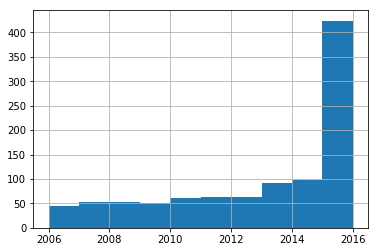

In [ ]:
# plot histogram of the column name year in movie dataframe, which shows how many movies release in a year.
movie['Year'].hist()


In [ ]:
# print the movie detail with title 'Grumpier Old Men'.
# movie.groupby('title').Grumpier Old Men.describe()
print(movie[movie['Title'] == "Grumpier Old Men"])

Empty DataFrame
Columns: [Rank, Title, Genre, Description, Director, Actors, Year, Runtime_Minutes, Rating, Votes, Revenue_Millions, Metascore]
Index: []


In [ ]:
# show those movies which are released after 1995-01-01
new_movie = movie['Year'].astype(int)
new_movie=movie['Year']>1995
movie.Year.replace('Year','new_movie', inplace=True)
movie.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime_Minutes,Rating,Votes,Revenue_Millions,Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [ ]:
# sort the movie DataFrame in decending order based on release_date
movie.sort_values('Year',ascending=False).tail(50)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime_Minutes,Rating,Votes,Revenue_Millions,Metascore
919,920,The Golden Compass,"Adventure,Family,Fantasy","In a parallel universe, young Lyra Belacqua jo...",Chris Weitz,"Nicole Kidman, Daniel Craig, Dakota Blue Richa...",2007,113,6.1,155078,70.080000,51.000000
828,829,Grindhouse,"Action,Horror,Thriller",Quentin Tarantino and Robert Rodriguez's homag...,Robert Rodriguez,"Kurt Russell, Rose McGowan, Danny Trejo, Zoë Bell",2007,191,7.6,160350,25.030000,58.985043
802,803,Beowulf,"Animation,Action,Adventure",The warrior Beowulf must fight and defeat the ...,Robert Zemeckis,"Ray Winstone, Crispin Glover, Angelina Jolie,R...",2007,115,6.2,146566,82.160000,59.000000
650,651,Sweeney Todd: The Demon Barber of Fleet Street,"Drama,Horror,Musical","The infamous story of Benjamin Barker, a.k.a. ...",Tim Burton,"Johnny Depp, Helena Bonham Carter, Alan Rickma...",2007,116,7.4,296289,52.880000,83.000000
804,805,1408,"Fantasy,Horror",A man who specializes in debunking paranormal ...,Mikael Håfström,"John Cusack, Samuel L. Jackson, Mary McCormack...",2007,104,6.8,221073,71.980000,64.000000
658,659,Eastern Promises,"Crime,Drama,Mystery",A Russian teenager living in London who dies d...,David Cronenberg,"Naomi Watts, Viggo Mortensen, Armin Mueller-St...",2007,100,7.7,198006,17.110000,82.000000
858,859,The Hills Have Eyes,Horror,A suburban American family is being stalked by...,Alexandre Aja,"Ted Levine, Kathleen Quinlan, Dan Byrd, Emilie...",2006,107,6.4,136642,41.780000,52.000000
815,816,Inside Man,"Crime,Drama,Mystery","A police detective, a bank robber, and a high-...",Spike Lee,"Denzel Washington, Clive Owen, Jodie Foster,Ch...",2006,129,7.6,285441,88.500000,76.000000
869,870,Mission: Impossible III,"Action,Adventure,Thriller",Agent Ethan Hunt comes into conflict with a da...,J.J. Abrams,"Tom Cruise, Michelle Monaghan, Ving Rhames, Ph...",2006,126,6.9,270429,133.380000,66.000000
830,831,Rocky Balboa,"Drama,Sport","Thirty years after the ring of the first bell,...",Sylvester Stallone,"Sylvester Stallone, Antonio Tarver, Milo Venti...",2006,102,7.2,171356,70.270000,63.000000


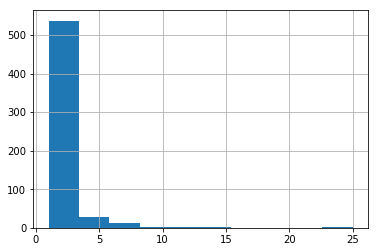

In [ ]:
# for each year, display the total number of movie with specific gerne for example Action=1000,adventure=400
count=movie.groupby(['Year', 'Genre']).size()
count
# plot histogram the upper calculated total count
count.hist()

![barchart.png](attachment:barchart.png)

In [ ]:
# filter the movies with specific gerne
# like show only those movies which are selected Action gerne
movie[movie.Genre.isin(['Action'])]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime_Minutes,Rating,Votes,Revenue_Millions,Metascore
123,124,Boyka: Undisputed IV,Action,In the fourth installment of the fighting fran...,Todor Chapkanov,"Scott Adkins, Teodora Duhovnikova, Alon Aboutb...",2016,86,7.4,10428,82.956376,58.985043
580,581,Kickboxer: Vengeance,Action,A kick boxer is out to avenge his brother.,John Stockwell,"Dave Bautista, Alain Moussi, Gina Carano, Jean...",2016,90,4.9,6809,131.560000,37.000000


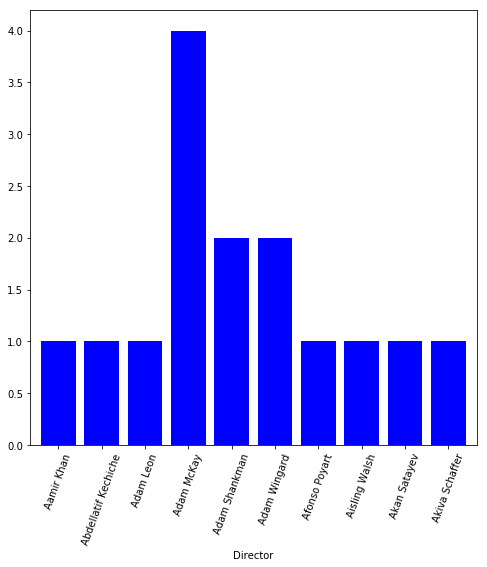

In [ ]:
# for each Director, display all the movies with detail.
# cnt=movie.groupby(['Director'])
# cnt
drt=movie.groupby('Director').describe()
drt
# count the movies and plot barchart top 10 director's movies.
cnt=movie.groupby('Director').size()
count=cnt.head(10)
%matplotlib inline
count.plot.bar(figsize=(8,8),rot=70,width = 0.8,color = "b",linewidth = 15, linestyle = "solid") 

In [ ]:
# for each Actor, display all the movies with detail.

# count the movies and visualize the top 10 actor's movies in plot


In [ ]:
# filter the movies with specific actor's name


In [ ]:
# List of top 5 Actor per year who has highest rating from the year 2010 - 2017

# plot horizontal barcahrt of upper output


In [ ]:
# visualize those to 10 runtime of movies

# visualize those to 10 runtime which has highest rating of movies


In [ ]:
# show count all movies which has rating more 3.0 and less than 7.0

# plot vertical barchart of upper output, movies w.r.t rating


In [ ]:
#  plot scatter between voting and rating 


In [ ]:
# print top 10 movies which has higher revenue

# plot horizontal barchart of upper output


In [ ]:
# top 10 movies which has highest number of voting greater than 1000000

# plot horizontal barchart of upper output 


In [ ]:
# print top 10 directors, which has generated highest "average ravenue".

# plot horizontal bar chart of revenue w.r.t director 

In [ ]:
# calculate total and average revenue of each gerne 

# prin hitogram of upper output, like showing below

![image.png](attachment:image.png)

In [ ]:
# Exploratory yearly analysis with dimensions on genres, revenue, rating
# like in 2010, each gerne movie generated average revenue and got this average rating

# plot barchart of gerne w.r.t to revenue and average


In [ ]:
# visualize metascore column with boxplot

# and explain what information you got from